In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os

print("Current working directory:", os.getcwd())
print("Files in this folder:", os.listdir())


Current working directory: /kaggle/working
Files in this folder: ['.virtual_documents']


In [4]:
!ls /kaggle/input

music-csv


In [5]:
!ls /kaggle/input/music-csv


music.csv


In [6]:
import pandas as pd

# ✅ Correct path
music_data = pd.read_csv('/kaggle/input/music-csv/music.csv')

# Check dataset info
print("Dataset shape:", music_data.shape)
print(music_data.head())


Dataset shape: (19, 4)
   Unnamed: 0    A       B       C
0           1  age  gender   genre
1           2   20       1  HipHop
2           3   23       1  HipHop
3           4   25       1  HipHop
4           5   26       1    Jazz


In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/music-csv/music.csv')

# Remove first row and first column
df = df.drop(index=0)                      # drop first row
df = df.drop(df.columns[0], axis=1)        # drop first column

# Reset the index (so it starts from 0 again)
df = df.reset_index(drop=True)

# (Optional) Rename columns properly
df.columns = ['age', 'gender', 'genre']

# Show the result
print(df.head())


  age gender   genre
0  20      1  HipHop
1  23      1  HipHop
2  25      1  HipHop
3  26      1    Jazz
4  29      1    Jazz


In [9]:
import pandas as pd 

# Load the dataset with correct path
music_data = pd.read_csv('/kaggle/input/music-csv/music.csv')

# Remove first row and first column if needed
music_data = music_data.drop(index=0)
music_data = music_data.drop(music_data.columns[0], axis=1)
music_data = music_data.reset_index(drop=True)
music_data.columns = ['age', 'gender', 'genre']

# Separate features (X) and target (y)
x = music_data.drop(columns=['genre'])
y = music_data['genre']

# Show data
print("X (features):")
print(x.head())
print("\nY (target):")
print(y.head())


X (features):
  age gender
0  20      1
1  23      1
2  25      1
3  26      1
4  29      1

Y (target):
0    HipHop
1    HipHop
2    HipHop
3      Jazz
4      Jazz
Name: genre, dtype: object


In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Assume x and y are already defined and trained
model = DecisionTreeClassifier()
model.fit(x, y)

# Use a DataFrame with correct feature names
test_data = pd.DataFrame([[21, 1], [22, 0]], columns=['age', 'gender'])
predictions = model.predict(test_data)

print(predictions)


['HipHop' 'Dance']


In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
score = accuracy_score(y_test, predictions)
print(score)


1.0


In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib   # ✅ import directly, not from sklearn.externals

# Example training (assuming you already have x and y)
model = DecisionTreeClassifier()
model.fit(x, y)

# Save the model
joblib.dump(model, 'music-recommender.joblib')

print("Model saved successfully!")


Model saved successfully!


In [26]:
import pandas as pd

sample = pd.DataFrame([[21, 1]], columns=['age', 'gender'])
predictions = loaded_model.predict(sample)
print(predictions)


['HipHop']


In [3]:
print(x.columns)


Index(['A', 'age', 'gender'], dtype='object')


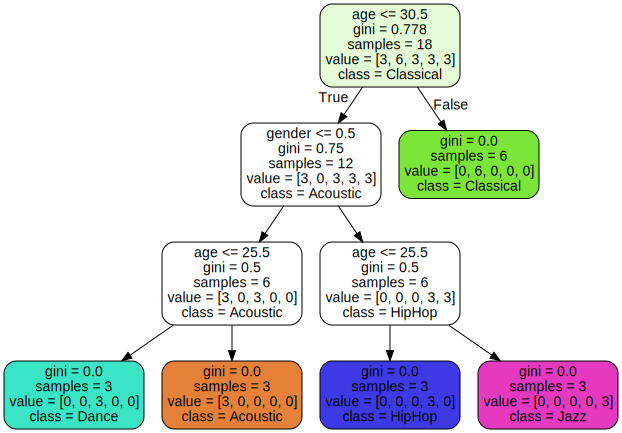

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

# Load dataset
music_data = pd.read_csv('/kaggle/input/music-csv/music.csv')

# Clean: remove first row (header-like) and rename
music_data = music_data.iloc[1:].reset_index(drop=True)
music_data.columns = ['A', 'age', 'gender', 'genre']

# If 'A' is gone, ignore dropping
if 'A' in music_data.columns:
    music_data = music_data.drop(columns=['A'])

# Prepare X and y
x = music_data.drop(columns=['genre'])
y = music_data['genre']

# Train Decision Tree
model = DecisionTreeClassifier(max_depth=3)
model.fit(x, y)

# Visualize directly in notebook
dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=x.columns,  # automatically uses real column names
    class_names=sorted(y.unique()),
    label='all',
    rounded=True,
    filled=True
)

# Render
graph = graphviz.Source(dot_data)
graph.render("music-recommender")  # optional, saves file
graph  # shows tree inline


In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Load dataset
music_data = pd.read_csv('/kaggle/input/music-csv/music.csv')

# Clean: remove the first row & rename columns
music_data = music_data.iloc[1:].reset_index(drop=True)
music_data.columns = ['A', 'age', 'gender', 'genre']

# Drop unnecessary column 'A'
music_data = music_data.drop(columns=['A'])

# Prepare data
x = music_data.drop(columns=['genre'])
y = music_data['genre']

# Train model
model = DecisionTreeClassifier(max_depth=3)
model.fit(x, y)

# Export tree
export_graphviz(
    model,
    out_file='music-recommender.dot',
    feature_names=['age', 'gender'],
    class_names=sorted(y.unique()),
    label='all',
    rounded=True,
    filled=True
)

print("✅ Tree exported successfully to 'music-recommender.dot'")


✅ Tree exported successfully to 'music-recommender.dot'
